# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
 !pip install numpy==1.26.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 85.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [1]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install numpy==1.26.4


In [2]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df=pd.read_parquet('/content/drive/MyDrive/pg-aiml-upgrad/EDA-NYC-Taxi-assignment/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/pg-aiml-upgrad/EDA-NYC-Taxi-assignment/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list=os.listdir()

# initialise an empty dataframe
df=pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path=os.path.join(os.getcwd(),file_name)

        # Reading the current file
        monthly_data=pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data=pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        monthly_data["date"]=monthly_data["tpep_pickup_datetime"].dt.date
        monthly_data["hour"]=monthly_data["tpep_pickup_datetime"].dt.hour

        for date in monthly_data["date"].unique():
            # Iterate through each hour of the selected date
            for hour in range(24):
                # Sample 5% of the hourly data randomly
                hour_data= monthly_data[(monthly_data["date"]==date)&(monthly_data["hour"]==hour)]
                sample=hour_data.sample(frac=0.05,random_state=42)

                # add data of this hour to the dataframe
                sampled_data=pd.concat([sampled_data,sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [4]:
# Ensure the final dataset size is within 250,000 to 300,000
if 250000 <= len(df) <= 300000:
    filtered_df = df  # Already within range, no changes needed
elif len(df) > 300000:
    filtered_df = df.sample(n=300000, random_state=42)  # Trim down to 300K
else:
    filtered_df = df.sample(n=250000, random_state=42)  # Increase to 250K if too small

# Check the final shape
filtered_df.shape


(300000, 22)

In [5]:
# Store the df in csv/parquet
filtered_df.to_parquet('/content/drive/MyDrive/pg-aiml-upgrad/EDA-NYC-Taxi-assignment/nyc_taxi_sampled_300k.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [6]:
# Load the new data file

df = pd.read_parquet('/content/drive/MyDrive/pg-aiml-upgrad/EDA-NYC-Taxi-assignment/nyc_taxi_sampled_300k.parquet')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
2702575,2,2023-06-25 22:34:24,2023-06-25 22:59:09,2.0,5.53,1.0,N,158,40,1,...,0.5,8.37,6.55,1.0,50.22,2.5,0.00,2023-06-25,22,NaN
815363,2,2023-09-09 14:47:50,2023-09-09 15:31:17,1.0,18.11,2.0,N,132,107,2,...,0.5,0.00,6.94,1.0,82.69,2.5,1.75,2023-09-09,14,NaN
1329328,2,2023-10-13 16:46:26,2023-10-13 16:59:05,1.0,1.54,1.0,N,140,142,1,...,0.5,3.72,0.00,1.0,22.32,2.5,0.00,2023-10-13,16,NaN
723661,1,2023-07-10 12:08:14,2023-07-10 12:17:15,1.0,1.80,1.0,N,239,75,1,...,0.5,4.60,0.00,1.0,20.00,2.5,0.00,2023-07-10,12,NaN
847078,2,2023-11-08 15:38:53,2023-11-08 15:56:51,1.0,2.61,1.0,N,186,113,1,...,0.5,4.34,0.00,1.0,26.04,2.5,0.00,2023-11-08,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441028,2,2023-06-23 13:21:45,2023-06-23 13:36:03,1.0,1.00,1.0,N,246,48,1,...,0.5,4.00,0.00,1.0,21.50,2.5,0.00,2023-06-23,13,NaN
532185,2,2023-12-05 19:59:07,2023-12-05 20:05:47,1.0,1.28,1.0,N,68,246,1,...,0.5,2.00,0.00,1.0,17.80,2.5,0.00,2023-12-05,19,NaN
1643492,2,2023-03-16 09:09:10,2023-03-16 09:25:03,2.0,2.69,1.0,N,237,234,2,...,0.5,0.00,0.00,1.0,21.00,2.5,0.00,2023-03-16,9,NaN
413936,2,2023-06-04 17:53:29,2023-06-04 18:07:31,1.0,2.46,1.0,N,229,263,1,...,0.5,5.00,0.00,1.0,24.60,2.5,0.00,2023-06-04,17,NaN


In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
2702575,2,2023-06-25 22:34:24,2023-06-25 22:59:09,2.0,5.53,1.0,N,158,40,1,...,0.5,8.37,6.55,1.0,50.22,2.5,0.00,2023-06-25,22,NaN
815363,2,2023-09-09 14:47:50,2023-09-09 15:31:17,1.0,18.11,2.0,N,132,107,2,...,0.5,0.00,6.94,1.0,82.69,2.5,1.75,2023-09-09,14,NaN
1329328,2,2023-10-13 16:46:26,2023-10-13 16:59:05,1.0,1.54,1.0,N,140,142,1,...,0.5,3.72,0.00,1.0,22.32,2.5,0.00,2023-10-13,16,NaN
723661,1,2023-07-10 12:08:14,2023-07-10 12:17:15,1.0,1.80,1.0,N,239,75,1,...,0.5,4.60,0.00,1.0,20.00,2.5,0.00,2023-07-10,12,NaN
847078,2,2023-11-08 15:38:53,2023-11-08 15:56:51,1.0,2.61,1.0,N,186,113,1,...,0.5,4.34,0.00,1.0,26.04,2.5,0.00,2023-11-08,15,NaN


In [8]:
df.shape

(300000, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 2702575 to 2917478
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289746 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289746 non-null  float64       
 6   store_and_fwd_flag     289746 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [10]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True,inplace=True)
df.drop(columns=['store_and_fwd_flag'],inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [11]:
# Combine the two airport fee columns

if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:

    df['airport_fee']=df[['Airport_fee','airport_fee']].max(axis=1)
    df.drop(columns=['Airport_fee'],inplace=True)



**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [13]:
# check where values of fare amount are negative

negative_fares = df[df['fare_amount'] < 0]
print(negative_fares)


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [14]:
# Analyse RatecodeID for the negative fare amounts
print(negative_fares['RatecodeID'].value_counts())



Series([], Name: count, dtype: int64)


In [15]:
# Find which columns have negative values

negative_columns = df.select_dtypes(include=['float64', 'int64']).columns
negative_counts = (df[negative_columns] < 0).sum()
print(negative_counts[negative_counts > 0])


mta_tax                  9
improvement_surcharge    9
total_amount             9
congestion_surcharge     6
airport_fee              3
dtype: int64


In [17]:
# fix these negative values
for col in negative_counts.index:
    df[col] = df[col].abs()

df.shape

(300000, 20)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column

missing_values = df.isnull().sum() / len(df) * 100
print(missing_values[missing_values > 0])


passenger_count         3.418
RatecodeID              3.418
congestion_surcharge    3.418
airport_fee             3.418
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Display the rows with null values
print(df[df['passenger_count'].isnull()])
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
23             2  2023-08-29 16:45:00   2023-08-29 16:57:00              NaN   
32             1  2023-02-21 10:26:36   2023-02-21 10:45:16              NaN   
50             1  2023-10-28 02:04:30   2023-10-28 02:25:39              NaN   
75             2  2023-05-02 22:43:00   2023-05-02 23:07:00              NaN   
106            2  2023-02-11 21:55:05   2023-02-11 22:05:57              NaN   
...          ...                  ...                   ...              ...   
299857         1  2023-10-06 23:35:02   2023-10-06 23:55:02              NaN   
299859         2  2023-05-18 16:13:13   2023-05-18 17:20:07              NaN   
299873         2  2023-03-18 12:17:40   2023-03-18 12:42:25              NaN   
299919         2  2023-07-09 12:46:32   2023-07-09 13:01:15              NaN   
299954         1  2023-05-17 14:01:05   2023-05-17 14:07:42              NaN   

        trip_distance  RatecodeID  PULo

<ipython-input-19-10e57eb33938>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


In [20]:
print(df['passenger_count'].value_counts())


passenger_count
1.0    228227
2.0     44058
3.0     10838
4.0      6015
0.0      4613
5.0      3749
6.0      2497
9.0         2
7.0         1
Name: count, dtype: int64


In [21]:
df['passenger_count'].value_counts(dropna=False)


,count
passenger_count,
1.0,228227
2.0,44058
3.0,10838
4.0,6015
0.0,4613
5.0,3749
6.0,2497
9.0,2
7.0,1


Did you find zeroes in passenger_count? Handle these.

In [22]:
zero_count = (df['passenger_count'] == 0).sum()
print(f"Number of zero values in passenger_count: {zero_count}")


Number of zero values in passenger_count: 4613


In [23]:
df.loc[df['passenger_count'] == 0, 'passenger_count'] = df['passenger_count'].median()
df['passenger_count'].value_counts(dropna=False)


,count
passenger_count,
1.0,232840
2.0,44058
3.0,10838
4.0,6015
5.0,3749
6.0,2497
9.0,2
7.0,1


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [24]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)


<ipython-input-24-47fa15ebc76c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [25]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)


<ipython-input-25-bb9472c7c17d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [26]:
# Handle any remaining missing values

print(df.isnull().sum())


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
date                         0
hour                         0
airport_fee              10254
dtype: int64


In [27]:
# Count missing airport_fee where trips involve an airport
missing_airport_trips = df[df['airport_fee'].isnull() &
                           ((df['PULocationID'].isin([132, 138])) | (df['DOLocationID'].isin([132, 138])))]

print(f"Trips with missing airport_fee but airport locations: {len(missing_airport_trips)}")


Trips with missing airport_fee but airport locations: 709


In [28]:
# Fill NaN values for airport trips with median airport fee
median_airport_fee = df['airport_fee'].median()

df.loc[df['airport_fee'].isnull() &
       ((df['PULocationID'].isin([132, 138])) | (df['DOLocationID'].isin([132, 138]))),
       'airport_fee'] = median_airport_fee

# Fill NaN values for non-airport trips with 0
df['airport_fee'].fillna(0, inplace=True)


<ipython-input-28-f4ca3aefafae>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['airport_fee'].fillna(0, inplace=True)


In [29]:
print(df.isnull().sum())


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
airport_fee              0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [30]:
# Describe the data and check if there are any potential outliers present

print(df.describe())

# Check for potential out of place values in various columns
outlier_conditions = {
    "Trip Distance = 0 but Fare > 300": (df["trip_distance"] == 0) & (df["fare_amount"] > 300),
    "Trip Distance & Fare = 0 but Different Zones": (df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]),
    "Trip Distance > 250 miles": df["trip_distance"] > 250,
    "Invalid Payment Type (0)": df["payment_type"] == 0
}

# Count occurrences
for condition, mask in outlier_conditions.items():
    print(f"{condition}: {mask.sum()} entries")





            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  300000.000000                      300000                      300000   
mean        1.732843  2023-07-02 19:54:27.404137  2023-07-02 20:11:55.052257   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:13:27   
25%         1.000000  2023-04-02 16:42:49.250000  2023-04-02 17:02:19.750000   
50%         2.000000  2023-06-27 11:11:12.500000         2023-06-27 11:26:59   
75%         2.000000  2023-10-07 00:03:32.750000  2023-10-07 00:20:16.250000   
max         6.000000         2023-12-31 23:57:12         2024-01-01 20:14:57   
std         0.447047                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    300000.000000  300000.000000  300000.000000  300000.000000   
mean          1.370940       3.659629       1.611120     165.247653   
min           1.000000       0.000000       1.000000       1.00000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [31]:
# remove passenger_count > 6
df = df[df["passenger_count"] <= 6]


In [32]:
# Continue with outlier handling

df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] > 300))]
df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]
df = df[df["trip_distance"] <= 250]
most_common_payment = df["payment_type"].mode()[0]
df["payment_type"].replace(0, most_common_payment, inplace=True)


<ipython-input-32-d25cfbe993a0>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["payment_type"].replace(0, most_common_payment, inplace=True)
<ipython-input-32-d25cfbe993a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["payment_type"].replace(0, most_common_payment, inplace=True)


In [33]:
# Do any columns need standardising?

df["log_trip_distance"] = np.log1p(df["trip_distance"])
df["log_fare_amount"] = np.log1p(df["fare_amount"])
df["log_total_amount"] = np.log1p(df["total_amount"])


In [34]:
print(df.describe())
print(df["payment_type"].value_counts())  # Ensure no more 0 values


            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  299977.000000                      299977                      299977   
mean        1.732850  2023-07-02 19:49:58.432973  2023-07-02 20:07:26.126046   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:13:27   
25%         1.000000         2023-04-02 16:36:42         2023-04-02 17:01:57   
50%         2.000000         2023-06-27 11:08:33         2023-06-27 11:25:47   
75%         2.000000         2023-10-06 23:55:22         2023-10-07 00:14:43   
max         6.000000         2023-12-31 23:57:12         2024-01-01 20:14:57   
std         0.447044                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    299977.000000  299977.000000  299977.000000  299977.000000   
mean          1.370872       3.441380       1.610693     165.247869   
min           1.000000       0.000000       1.000000       1.00000

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [35]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'airport_fee',
 'log_trip_distance',
 'log_fare_amount',
 'log_total_amount']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [36]:
df.dtypes


,0
VendorID,int64
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
PULocationID,int64
DOLocationID,int64
payment_type,int64
fare_amount,float64


In [37]:
# Categorizing variables
numerical_vars = [
    "passenger_count", "trip_distance", "RatecodeID", "PULocationID",
    "DOLocationID", "pickup_hour", "trip_duration",
    "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount",
    "improvement_surcharge", "total_amount", "congestion_surcharge", "airport_fee"
]

categorical_vars = [
    "VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "payment_type"
]

print("Numerical Variables:", numerical_vars)
print("Categorical Variables:", categorical_vars)


Numerical Variables: ['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'pickup_hour', 'trip_duration', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
Categorical Variables: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_type']


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<ipython-input-38-7cb54120c3e5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="coolwarm")


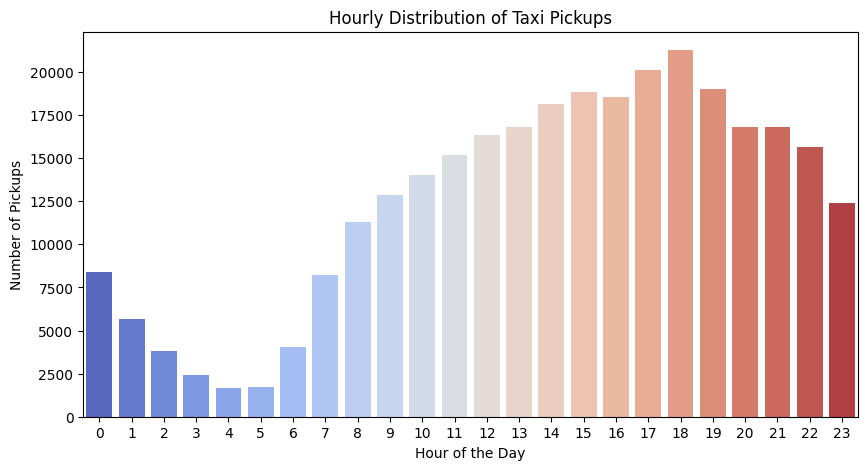

In [38]:
# Find and show the hourly trends in taxi pickups

import matplotlib.pyplot as plt
import seaborn as sns

# Group by hour
hourly_pickups = df.groupby("hour")["hour"].count()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Distribution of Taxi Pickups")
plt.xticks(range(0, 24))
plt.show()


<ipython-input-39-e19e7121577e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="viridis")


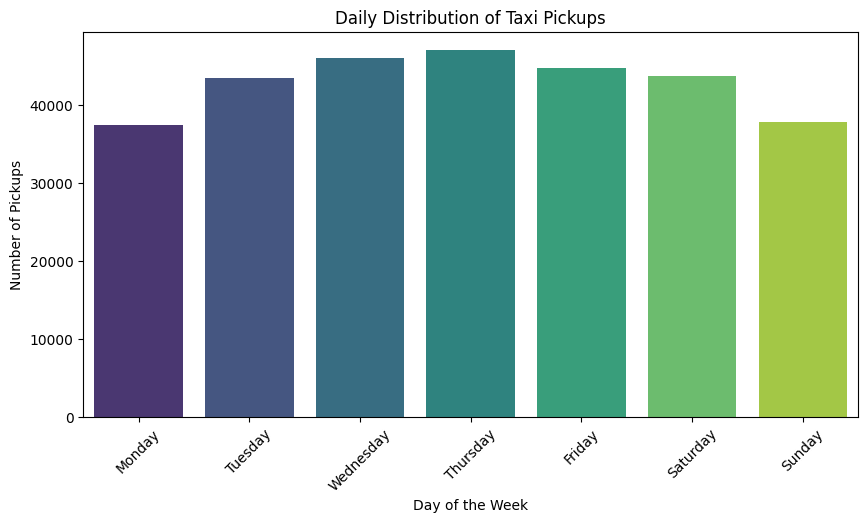

In [39]:
# Find and show the daily trends in taxi pickups (days of the week)
df["pickup_day"] = df["tpep_pickup_datetime"].dt.day_name()

# Group by day
daily_pickups = df["pickup_day"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Distribution of Taxi Pickups")
plt.xticks(rotation=45)
plt.show()



<ipython-input-40-e700c3e92ea9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="magma")


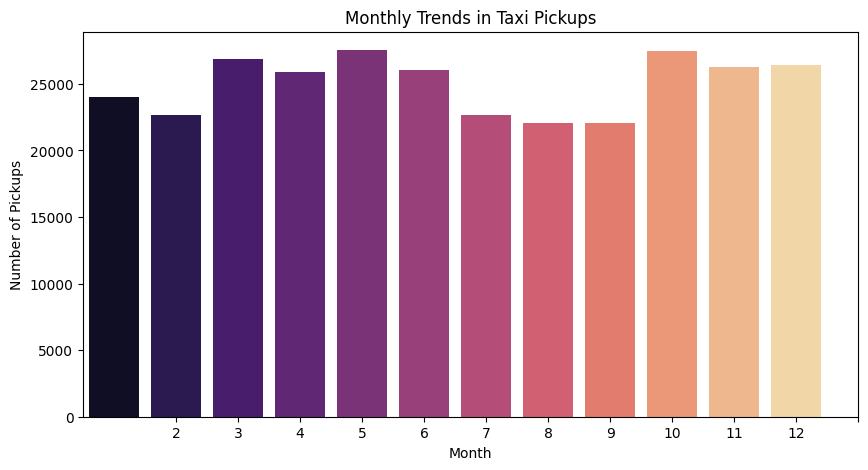

In [40]:
# Show the monthly trends in pickups

df["pickup_month"] = df["tpep_pickup_datetime"].dt.month
monthly_pickups = df.groupby("pickup_month")["pickup_month"].count()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="magma")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trends in Taxi Pickups")
plt.xticks(range(1, 13))
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [41]:
# Analyse the above parameters

financial_cols = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]
(df[financial_cols] <= 0).sum()


,0
fare_amount,90
tip_amount,68667
total_amount,41
trip_distance,5895


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [42]:
# Create a df with non zero entries for the selected parameters.

df_filtered = df[(df["fare_amount"] > 0) &
                 (df["trip_distance"] > 0) &
                 (df["total_amount"] > 0)]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

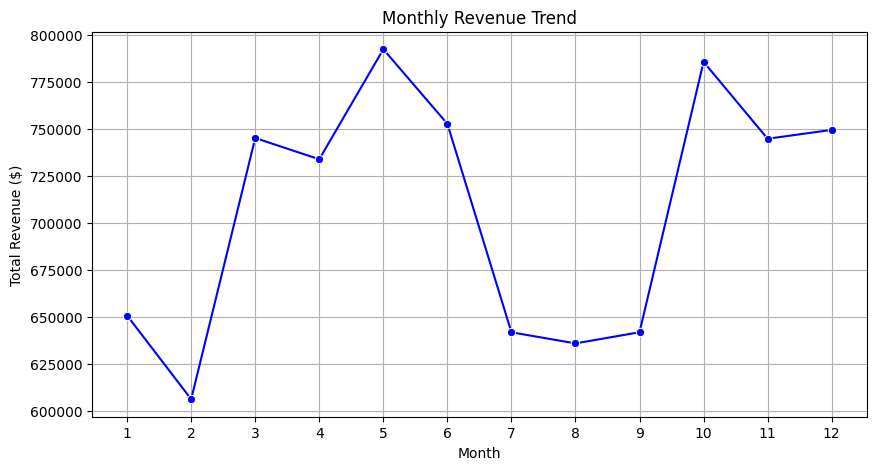

In [43]:
# Group data by month and analyse monthly revenue

monthly_revenue = df_filtered.groupby("pickup_month")["total_amount"].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker="o", color="b")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trend")
plt.xticks(range(1, 13))
plt.grid()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

<ipython-input-44-3366c904706a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["quarter"] = df_filtered["tpep_pickup_datetime"].dt.to_period("Q")


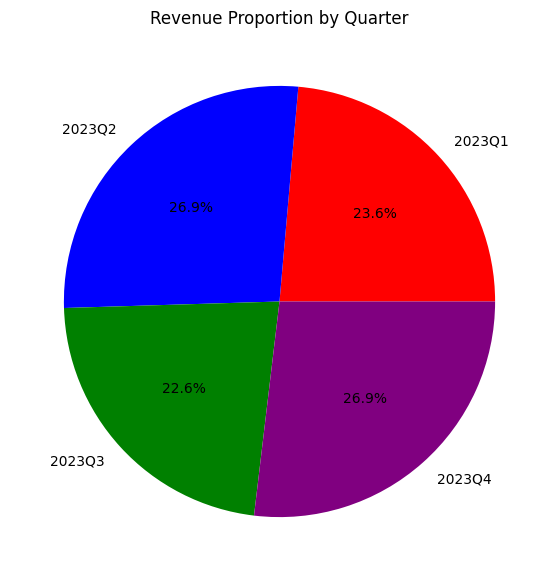

In [44]:
# Calculate proportion of each quarter

df_filtered["quarter"] = df_filtered["tpep_pickup_datetime"].dt.to_period("Q")
quarterly_revenue = df_filtered.groupby("quarter")["total_amount"].sum()

plt.figure(figsize=(7,7))
plt.pie(quarterly_revenue, labels=quarterly_revenue.index, autopct="%1.1f%%", colors=["red", "blue", "green", "purple"])
plt.title("Revenue Proportion by Quarter")
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

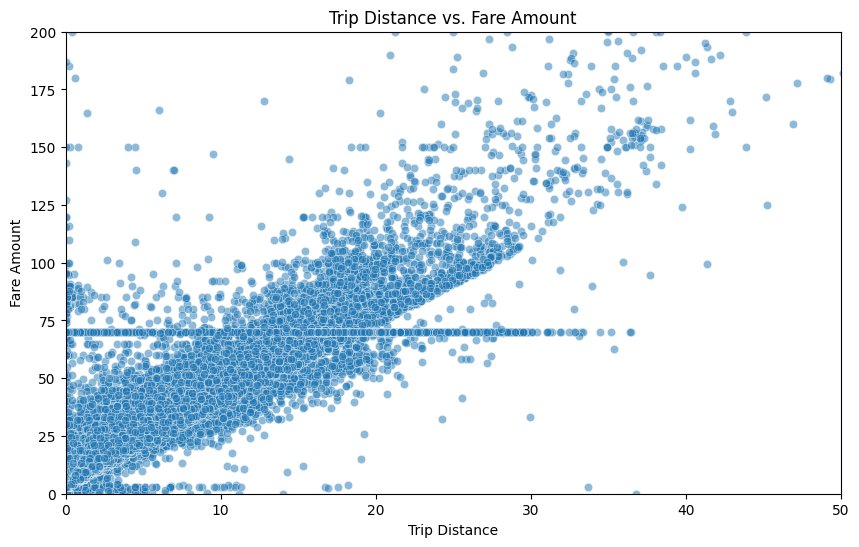

,trip_distance,fare_amount
trip_distance,1.000000,0.943905
fare_amount,0.943905,1.000000


In [45]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_filtered["trip_distance"], y=df_filtered["fare_amount"], alpha=0.5)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs. Fare Amount")
plt.xlim(0, 50)
plt.ylim(0, 200)
plt.show()

# Correlation
df_filtered[["trip_distance", "fare_amount"]].corr()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

<ipython-input-46-1c07fd77e70c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["trip_duration"] = (df_filtered["tpep_dropoff_datetime"] - df_filtered["tpep_pickup_datetime"]).dt.total_seconds() / 60  # Convert to minutes


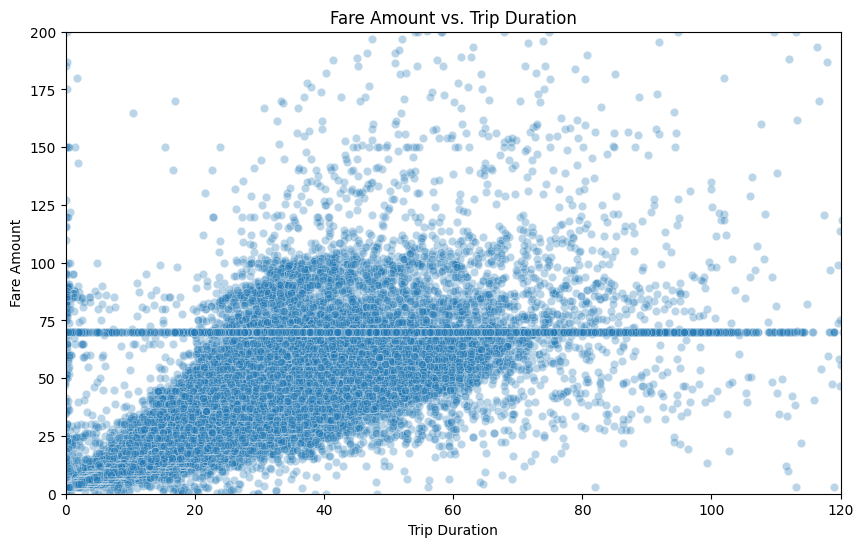

,trip_duration,fare_amount
trip_duration,1.000000,0.278957
fare_amount,0.278957,1.000000


In [46]:
# Show relationship between fare and trip duration

df_filtered["trip_duration"] = (df_filtered["tpep_dropoff_datetime"] - df_filtered["tpep_pickup_datetime"]).dt.total_seconds() / 60  # Convert to minutes

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_filtered["trip_duration"], y=df_filtered["fare_amount"], alpha=0.3)
plt.xlabel("Trip Duration")
plt.ylabel("Fare Amount")
plt.title("Fare Amount vs. Trip Duration")
plt.xlim(0, 120)
plt.ylim(0, 200)
plt.show()

df_filtered[["trip_duration", "fare_amount"]].corr()


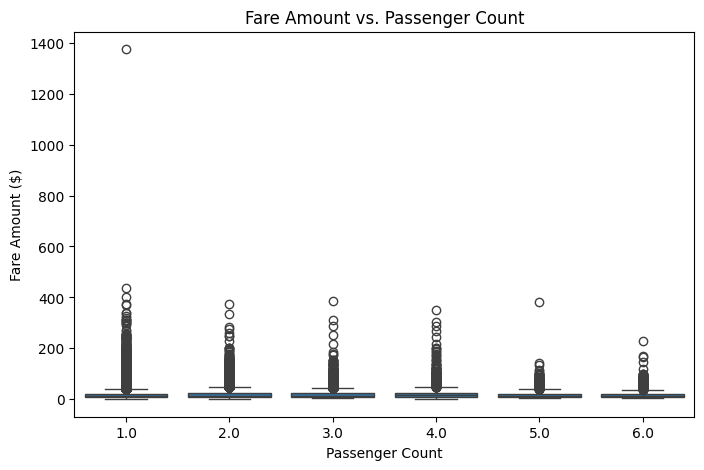

,passenger_count,fare_amount
passenger_count,1.000000,0.041501
fare_amount,0.041501,1.000000


In [47]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8,5))
sns.boxplot(x=df_filtered["passenger_count"], y=df_filtered["fare_amount"])
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs. Passenger Count")
plt.show()

df_filtered[["passenger_count", "fare_amount"]].corr()



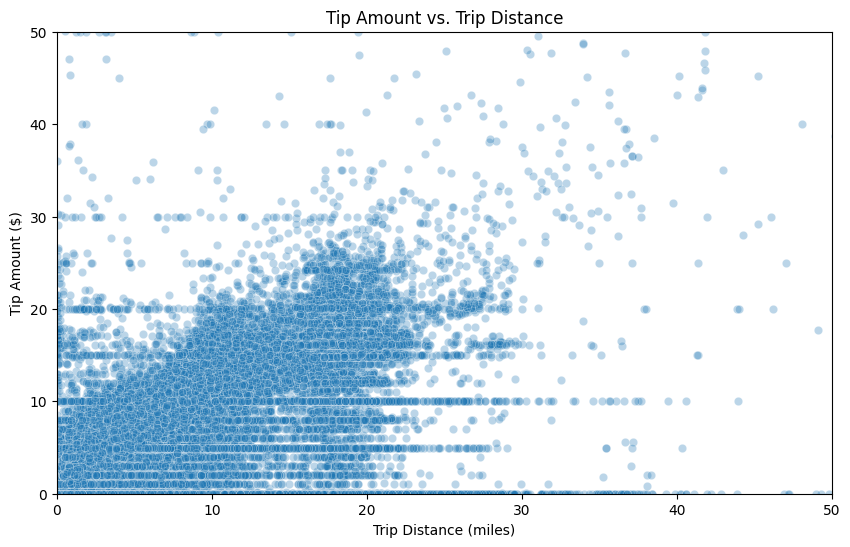

,trip_distance,tip_amount
trip_distance,1.000000,0.595284
tip_amount,0.595284,1.000000


In [48]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_filtered["trip_distance"], y=df_filtered["tip_amount"], alpha=0.3)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Tip Amount vs. Trip Distance")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()

df_filtered[["trip_distance", "tip_amount"]].corr()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<ipython-input-49-8ee84d8d118b>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


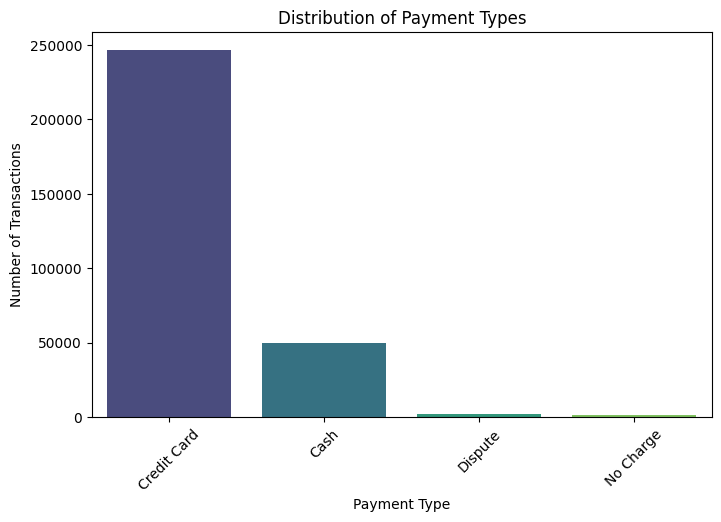

In [49]:
# Analyse the distribution of different payment types (payment_type).

import matplotlib.pyplot as plt
import seaborn as sns

payment_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

df['payment_type'] = df['payment_type'].map(payment_mapping)

payment_counts = df['payment_type'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [50]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [51]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("/content/drive/MyDrive/pg-aiml-upgrad/EDA-NYC-Taxi-assignment/Datasets and Dictionary/taxi_zones/taxi_zones.shp")# read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

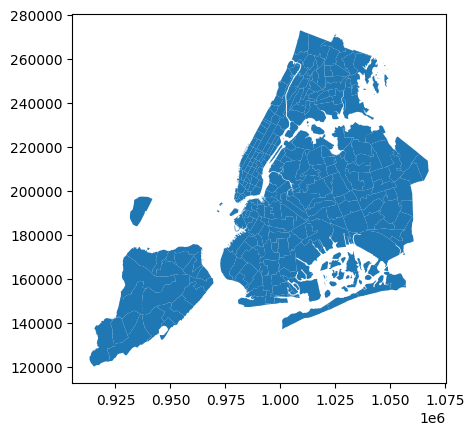

In [52]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [53]:
# Merge zones and trip records using locationID and PULocationID
df = df.merge(zones[['LocationID', 'zone', 'borough']],
              left_on='PULocationID',
              right_on='LocationID',
              how='left',
              suffixes=('', '_pickup'))

df = df.merge(zones[['LocationID', 'zone', 'borough']],
              left_on='DOLocationID',
              right_on='LocationID',
              how='left',
              suffixes=('', '_dropoff'))

df[['PULocationID', 'zone', 'borough', 'DOLocationID', 'zone_dropoff', 'borough_dropoff']].head()



,PULocationID,zone,borough,DOLocationID,zone_dropoff,borough_dropoff
0,158,Meatpacking/West Village West,Manhattan,40,Carroll Gardens,Brooklyn
1,132,JFK Airport,Queens,107,Gramercy,Manhattan
2,140,Lenox Hill East,Manhattan,142,Lincoln Square East,Manhattan
3,239,Upper West Side South,Manhattan,75,East Harlem South,Manhattan
4,186,Penn Station/Madison Sq West,Manhattan,113,Greenwich Village North,Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [54]:
# Group data by location and calculate the number of trips

trip_counts = df.groupby("PULocationID").size().reset_index(name="trip_count")

trip_counts.head()


,PULocationID,trip_count
0,1,38
1,3,8
2,4,399
3,5,2
4,6,3


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [55]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_counts, left_on="LocationID", right_on="PULocationID", how="left")

zones["trip_count"] = zones["trip_count"].fillna(0)
zones.sort_values(by="trip_count", ascending=False).head()




,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,15327.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,13973.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,13961.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,12636.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,10494.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

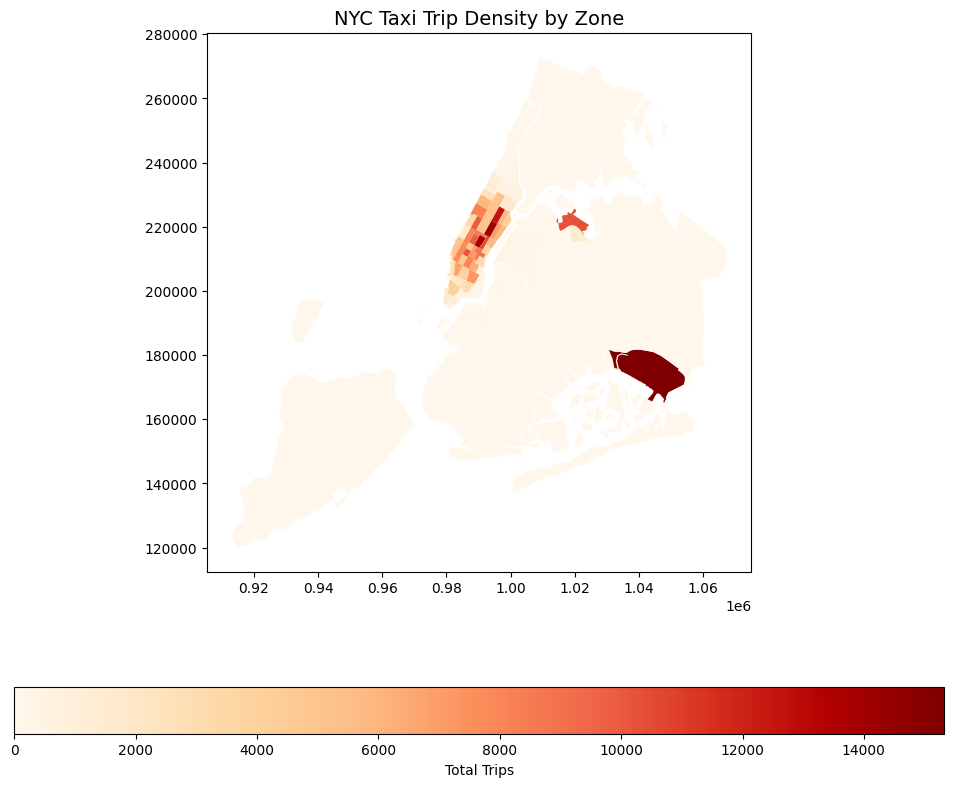

In [56]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it

zones.plot(column="trip_count",
           ax=ax,
           cmap="OrRd",
           legend=True,
           legend_kwds={"label": "Total Trips", "orientation": "horizontal"})

plt.title("NYC Taxi Trip Density by Zone", fontsize=14)

plt.show()




In [57]:
# can you try displaying the zones DF sorted by the number of trips?

zones[["LocationID", "zone", "borough", "trip_count"]].sort_values(by="trip_count", ascending=False).head(10)


,LocationID,zone,borough,trip_count
131,132,JFK Airport,Queens,15327.0
236,237,Upper East Side South,Manhattan,13973.0
160,161,Midtown Center,Manhattan,13961.0
235,236,Upper East Side North,Manhattan,12636.0
161,162,Midtown East,Manhattan,10494.0
137,138,LaGuardia Airport,Queens,10271.0
185,186,Penn Station/Madison Sq West,Manhattan,10169.0
141,142,Lincoln Square East,Manhattan,9895.0
229,230,Times Sq/Theatre District,Manhattan,9767.0
169,170,Murray Hill,Manhattan,8855.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [58]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'hour', 'airport_fee',
       'log_trip_distance', 'log_fare_amount', 'log_total_amount',
       'pickup_day', 'pickup_month', 'LocationID', 'zone', 'borough',
       'LocationID_dropoff', 'zone_dropoff', 'borough_dropoff'],
      dtype='object')

In [59]:
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds()


In [60]:
df["trip_duration"]

,trip_duration
0,1485.0
1,2607.0
2,759.0
3,541.0
4,1078.0
...,...
300091,858.0
300092,400.0
300093,953.0
300094,842.0


In [61]:
# Find routes which have the slowest speeds at different times of the day


#df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds()
df["trip_duration_hours"] = df["trip_duration"] / 3600  # Convert seconds to hours

# Remove invalid trips (zero distance OR very small duration)
df = df[(df["trip_distance"] > 0) & (df["trip_duration_hours"] > (1 / 60))]  # More than 1 minute

# Group by Pickup, Dropoff Location, and Hour, then calculate total distance and duration
route_speeds = (
    df.groupby(["PULocationID", "DOLocationID", "hour"])
    .agg(
        total_distance=("trip_distance", "sum"),
        total_duration=("trip_duration_hours", "sum")
    )
    .reset_index()
)

# Calculate average speed (distance / duration)
route_speeds["avg_speed"] = route_speeds["total_distance"] / route_speeds["total_duration"]

# Identify slowest routes for each hour
slowest_routes = route_speeds.sort_values(by="avg_speed").groupby("hour").first().reset_index()

# Display slowest routes
slowest_routes.head()



,hour,PULocationID,DOLocationID,total_distance,total_duration,avg_speed
0,0,263,68,4.64,23.911111,0.194052
1,1,90,33,4.44,23.217778,0.191233
2,2,161,264,2.23,21.744722,0.102554
3,3,246,143,2.48,20.363333,0.121788
4,4,162,162,1.54,23.772778,0.064780


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

<ipython-input-62-9a6f88846bfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="Blues_r")


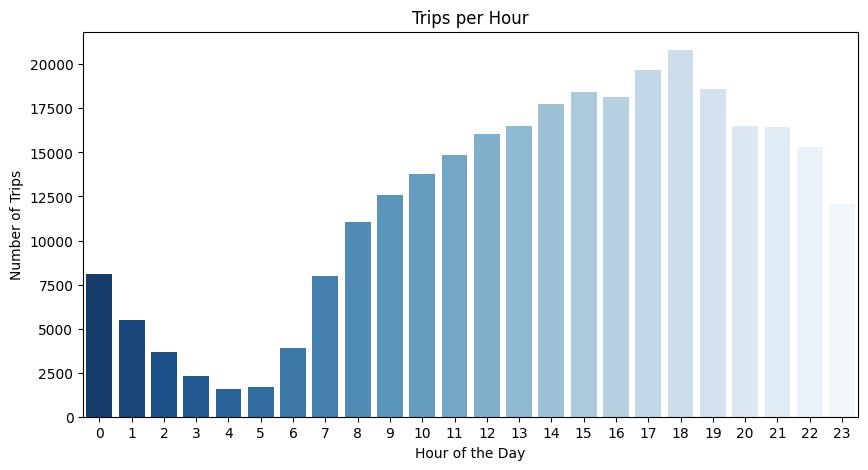

(18, 20810)

In [62]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trips = df["hour"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="Blues_r")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trips per Hour")
plt.show()

busiest_hour = hourly_trips.idxmax()
busiest_hour_count = hourly_trips.max()
busiest_hour, busiest_hour_count

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [63]:
len(df)


293283

In [64]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05 #taking 5%
hourly_trips_scaled = (hourly_trips / sample_fraction).astype(int)
hourly_trips_scaled.nlargest(5)



,count
hour,
18,416200
17,393880
19,372380
15,368780
16,363200


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

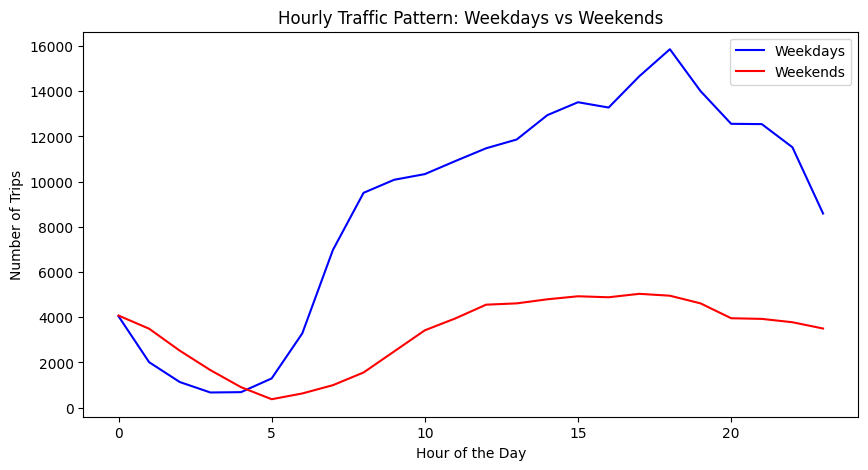

In [65]:
# Compare traffic trends for the week days and weekends

# Extract weekday information (0=Monday, 6=Sunday)
df["pickup_weekday"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.weekday

# Separate weekdays (Mon-Fri) and weekends (Sat-Sun)
weekday_trips = df[df["pickup_weekday"] < 5].groupby("hour").size()
weekend_trips = df[df["pickup_weekday"] >= 5].groupby("hour").size()

# Plot the comparison
plt.figure(figsize=(10, 5))
sns.lineplot(x=weekday_trips.index, y=weekday_trips.values, label="Weekdays", color="blue")
sns.lineplot(x=weekend_trips.index, y=weekend_trips.values, label="Weekends", color="red")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Traffic Pattern: Weekdays vs Weekends")
plt.legend()
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

<ipython-input-66-04cbd4e1448c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values, palette="Blues_r")


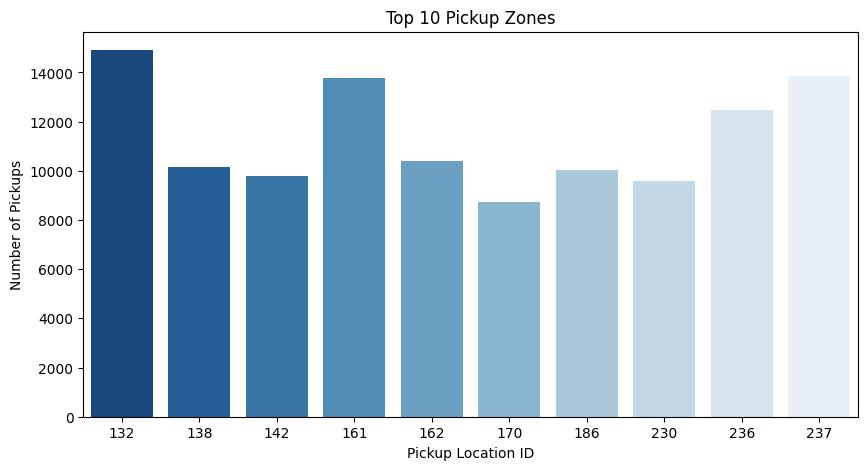

<ipython-input-66-04cbd4e1448c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dropoff_zones.index, y=top_dropoff_zones.values, palette="Reds_r")


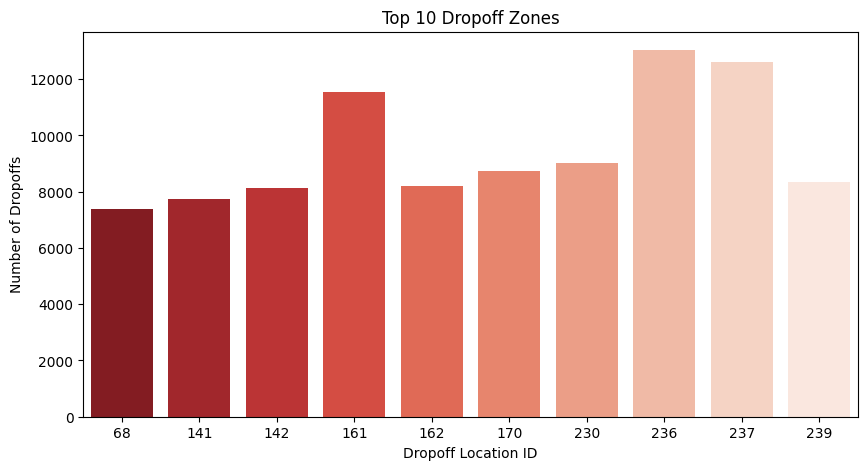

In [66]:
# Find top 10 pickup and dropoff zones

top_pickup_zones = df["PULocationID"].value_counts().head(10)
top_dropoff_zones = df["DOLocationID"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values, palette="Blues_r")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Pickups")
plt.title("Top 10 Pickup Zones")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=top_dropoff_zones.index, y=top_dropoff_zones.values, palette="Reds_r")
plt.xlabel("Dropoff Location ID")
plt.ylabel("Number of Dropoffs")
plt.title("Top 10 Dropoff Zones")
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [67]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

zone_ratios = df["PULocationID"].value_counts() / df["DOLocationID"].value_counts()
zone_ratios = zone_ratios.dropna().sort_values(ascending=False)

top_10_ratios = zone_ratios.head(10)

bottom_10_ratios = zone_ratios.tail(10)

top_10_ratios, bottom_10_ratios


(70     10.213740
 132     4.679008
 138     2.688542
 186     1.531160
 43      1.396557
 114     1.388415
 249     1.375495
 162     1.264645
 142     1.204207
 161     1.195562
 Name: count, dtype: float64,
 201    0.057143
 202    0.054217
 64     0.050000
 160    0.047059
 171    0.039216
 73     0.035714
 53     0.028571
 16     0.020000
 257    0.017699
 1      0.003390
 Name: count, dtype: float64)

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [68]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours = df[(df["hour"] >= 23) | (df["hour"] <= 5)]

top_night_pickups = night_hours["PULocationID"].value_counts().head(10)

top_night_dropoffs = night_hours["DOLocationID"].value_counts().head(10)

top_night_pickups, top_night_dropoffs



(PULocationID
 79     2572
 132    2305
 249    2000
 48     1692
 148    1625
 114    1405
 230    1260
 186    1073
 164     986
 68      946
 Name: count, dtype: int64,
 DOLocationID
 79     1326
 48     1079
 170    1054
 68      976
 107     907
 141     887
 249     777
 263     755
 148     711
 229     708
 Name: count, dtype: int64)

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [69]:
# Filter for night hours (11 PM to 5 AM)
# and day (6 AM to 10 PM)
night_revenue = df[(df["hour"] >= 23) | (df["hour"] <= 5)]["total_amount"].sum()
day_revenue = df[(df["hour"] > 5) & (df["hour"] < 23)]["total_amount"].sum()

total_revenue = night_revenue + day_revenue
night_share = night_revenue / total_revenue * 100
day_share = day_revenue / total_revenue * 100

night_share, day_share



(12.135616613820185, 87.86438338617982)

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [70]:
# Analyse the fare per mile per passenger for different passenger counts

df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]
df["fare_per_mile_per_passenger"] = df["fare_per_mile"] / df["passenger_count"]

fare_per_mile_passenger = df.groupby("passenger_count")["fare_per_mile_per_passenger"].mean()

fare_per_mile_passenger



,fare_per_mile_per_passenger
passenger_count,
1.0,8.195292
2.0,4.106408
3.0,2.661634
4.0,2.291200
5.0,1.557353
6.0,1.308618


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

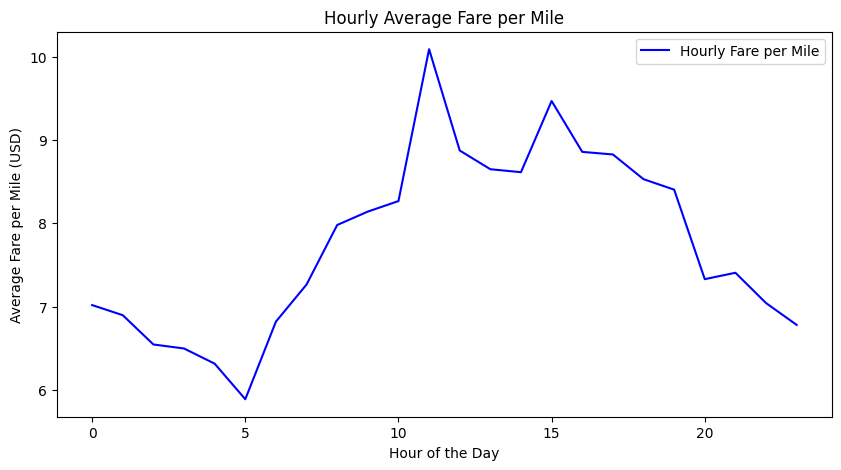

<ipython-input-71-8e98190d3861>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_fare_per_mile.index, y=daily_fare_per_mile.values, palette="viridis")


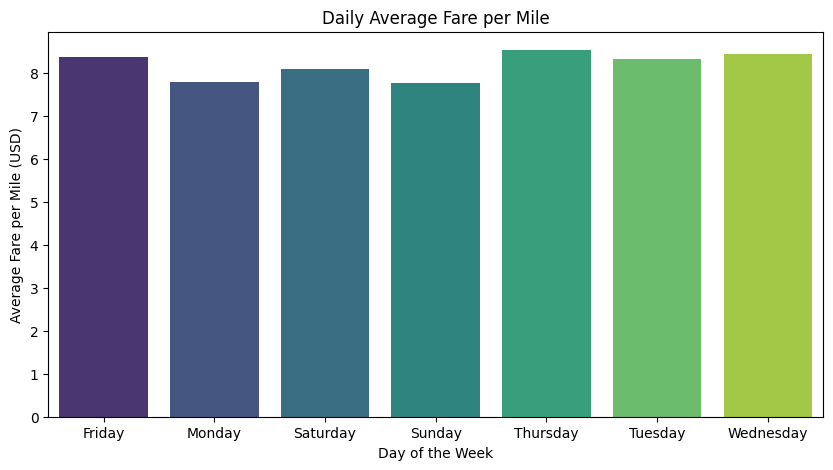

In [71]:
# Compare the average fare per mile for different days and for different times of the day

df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]

hourly_fare_per_mile = df.groupby("hour")["fare_per_mile"].mean()

daily_fare_per_mile = df.groupby("pickup_day")["fare_per_mile"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_fare_per_mile.index, y=hourly_fare_per_mile.values, label="Hourly Fare per Mile", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Hourly Average Fare per Mile")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=daily_fare_per_mile.index, y=daily_fare_per_mile.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Daily Average Fare per Mile")
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

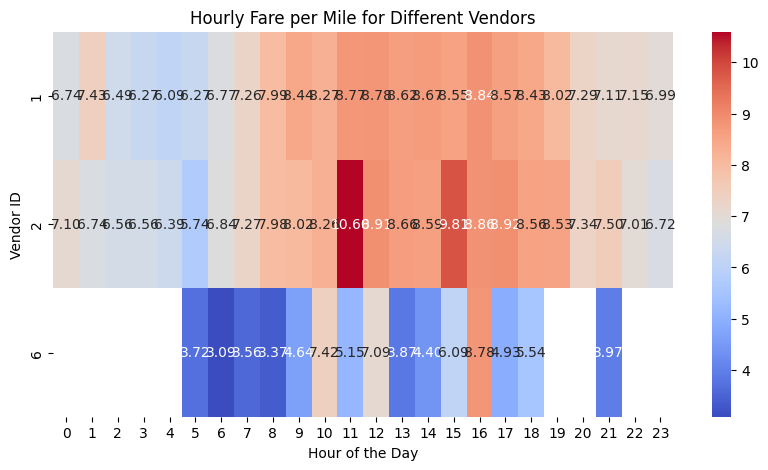

In [72]:
# Compare fare per mile for different vendors

vendor_hourly_fare = df.groupby(["VendorID", "hour"])["fare_per_mile"].mean().unstack()

plt.figure(figsize=(10, 5))
sns.heatmap(vendor_hourly_fare, cmap="coolwarm", annot=True, fmt=".2f")
plt.xlabel("Hour of the Day")
plt.ylabel("Vendor ID")
plt.title("Hourly Fare per Mile for Different Vendors")
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


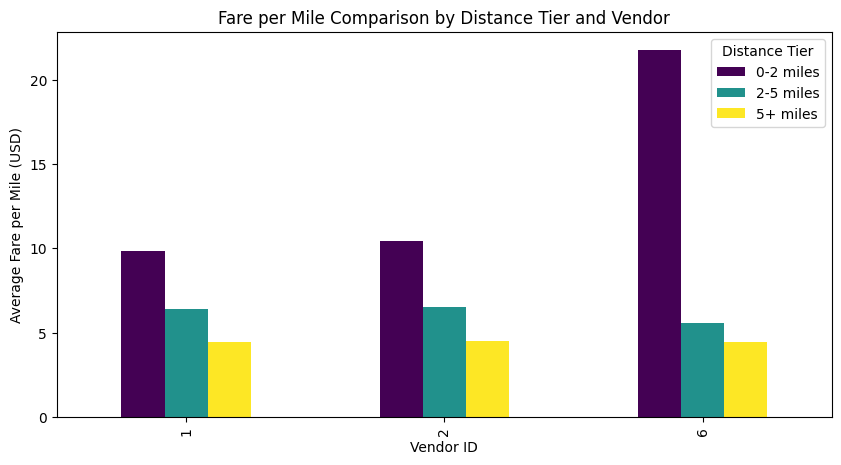

In [73]:
# Defining distance tiers

conditions = [
    (df["trip_distance"] <= 2),
    (df["trip_distance"] > 2) & (df["trip_distance"] <= 5),
    (df["trip_distance"] > 5)
]
choices = ["0-2 miles", "2-5 miles", "5+ miles"]

df["distance_tier"] = np.select(conditions, choices, default="Unknown")

fare_tiered = df.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().unstack()

fare_tiered.plot(kind="bar", figsize=(10, 5), colormap="viridis")
plt.xlabel("Vendor ID")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Fare per Mile Comparison by Distance Tier and Vendor")
plt.legend(title="Distance Tier")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

<ipython-input-74-3236402d9130>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = df.groupby(pd.cut(df["trip_distance"], bins=[0, 2, 5, 10, 20, np.inf]))["tip_percentage"].mean()
<ipython-input-74-3236402d9130>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tip_by_distance.index.astype(str), y=tip_by_distance.values, ax=axes[0], palette="viridis")
<ipython-input-74-3236402d9130>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tip_by_passenger.index, y=tip_by_passenger.values,

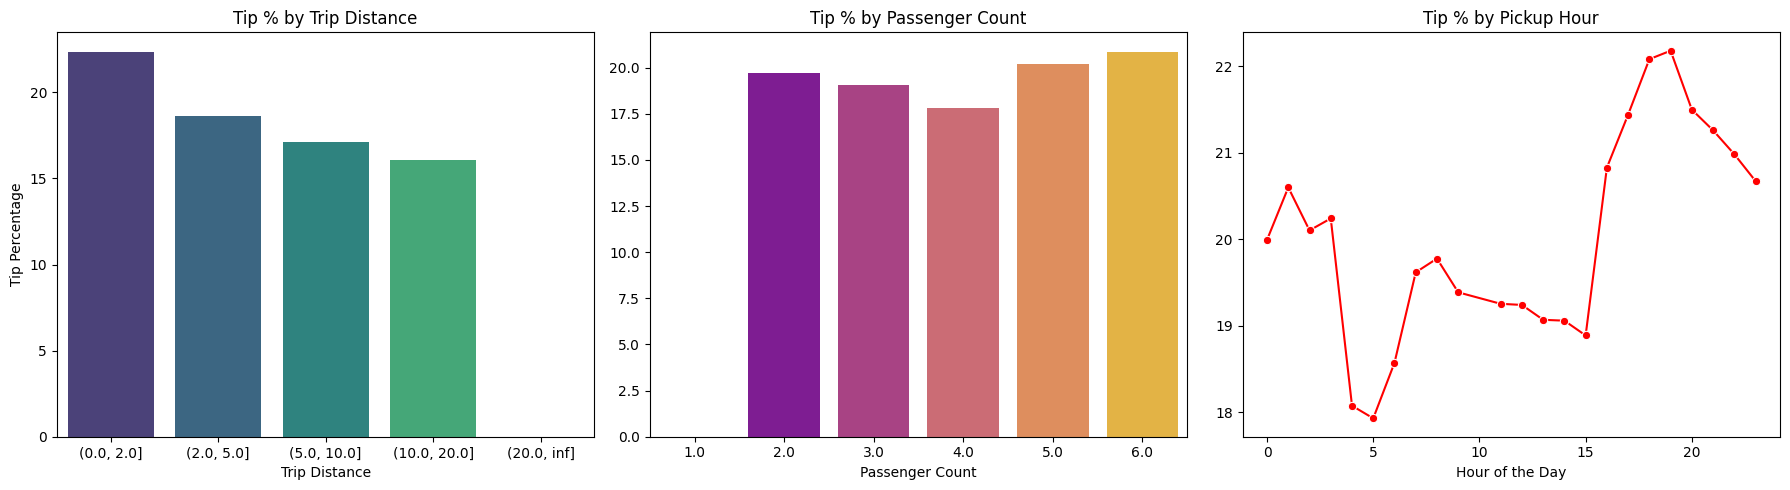

In [74]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df["tip_percentage"] = (df["tip_amount"] / df["fare_amount"]) * 100

tip_by_distance = df.groupby(pd.cut(df["trip_distance"], bins=[0, 2, 5, 10, 20, np.inf]))["tip_percentage"].mean()
tip_by_passenger = df.groupby("passenger_count")["tip_percentage"].mean()
tip_by_hour = df.groupby("hour")["tip_percentage"].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=tip_by_distance.index.astype(str), y=tip_by_distance.values, ax=axes[0], palette="viridis")
axes[0].set_title("Tip % by Trip Distance")
axes[0].set_xlabel("Trip Distance")
axes[0].set_ylabel("Tip Percentage")

sns.barplot(x=tip_by_passenger.index, y=tip_by_passenger.values, ax=axes[1], palette="plasma")
axes[1].set_title("Tip % by Passenger Count")
axes[1].set_xlabel("Passenger Count")

sns.lineplot(x=tip_by_hour.index, y=tip_by_hour.values, ax=axes[2], marker="o", color="red")
axes[2].set_title("Tip % by Pickup Hour")
axes[2].set_xlabel("Hour of the Day")

plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [75]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tips = df[df["tip_percentage"] < 10]
high_tips = df[df["tip_percentage"] > 25]

comparison = pd.DataFrame({
    "Low Tips (<10%)": low_tips[["trip_distance", "passenger_count", "fare_amount"]].mean(),
    "High Tips (>25%)": high_tips[["trip_distance", "passenger_count", "fare_amount"]].mean()
})

comparison


,Low Tips (<10%),High Tips (>25%)
trip_distance,3.935251,2.319551
passenger_count,1.412602,1.359349
fare_amount,21.520355,14.460722


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

<ipython-input-76-39e3a365ff10>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_passenger.index, y=daily_passenger.values, ax=axes[1], palette="coolwarm")


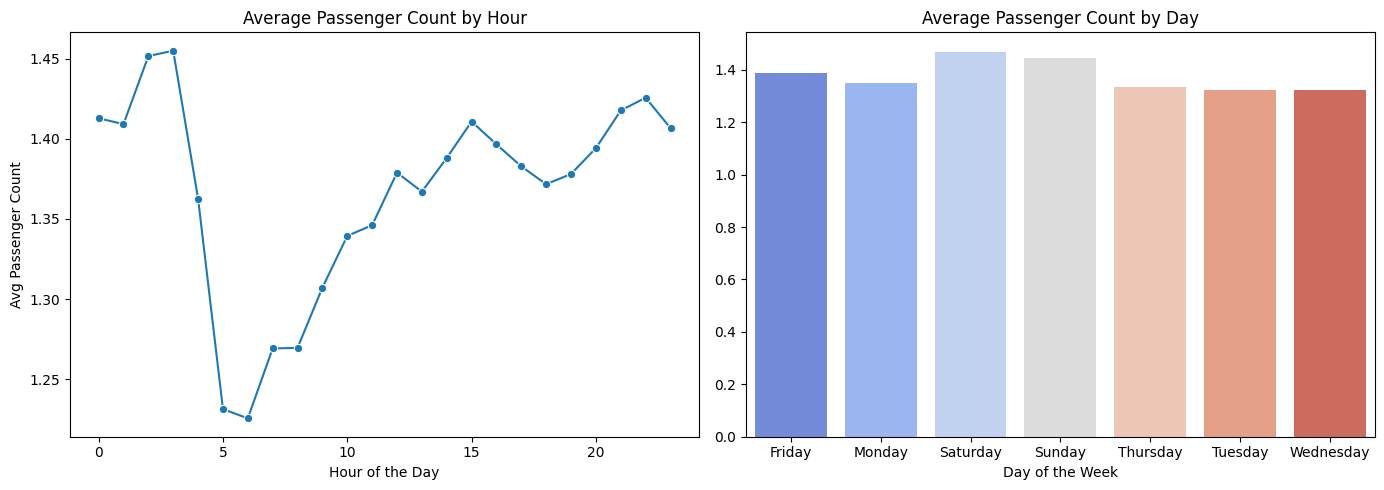

In [76]:
# See how passenger count varies across hours and days

hourly_passenger = df.groupby("hour")["passenger_count"].mean()

daily_passenger = df.groupby("pickup_day")["passenger_count"].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.lineplot(x=hourly_passenger.index, y=hourly_passenger.values, ax=axes[0], marker="o")
axes[0].set_title("Average Passenger Count by Hour")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Avg Passenger Count")

sns.barplot(x=daily_passenger.index, y=daily_passenger.values, ax=axes[1], palette="coolwarm")
axes[1].set_title("Average Passenger Count by Day")
axes[1].set_xlabel("Day of the Week")

plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

<ipython-input-77-1a3a9f89459b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_zones.index, y=top_10_zones.values, palette="viridis")


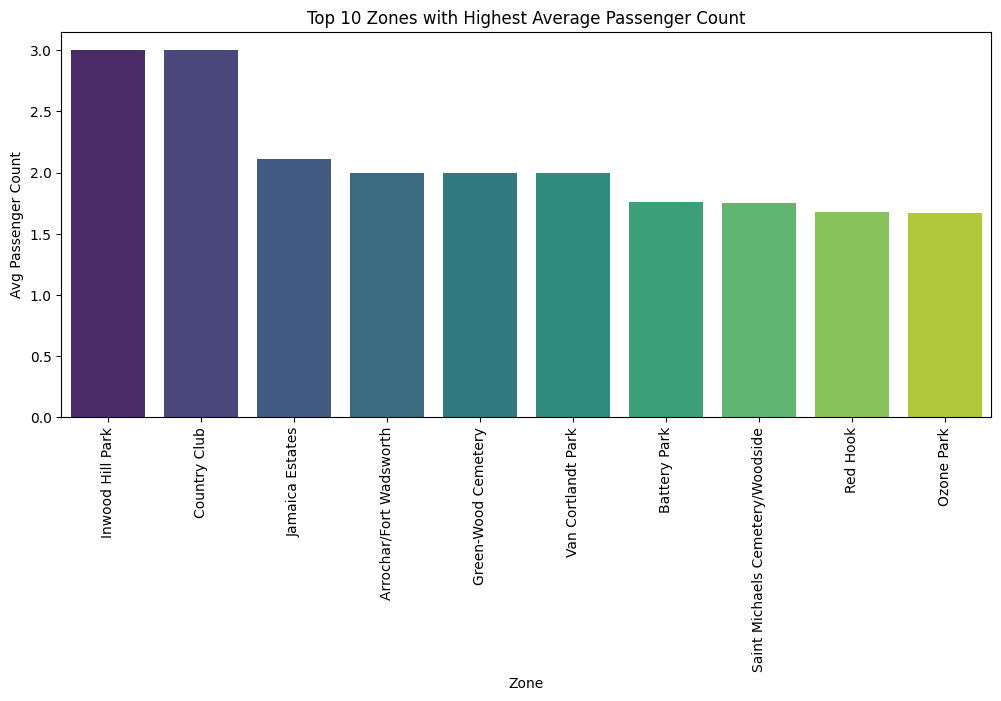

<ipython-input-77-1a3a9f89459b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_zones.index, y=bottom_10_zones.values, palette="coolwarm")


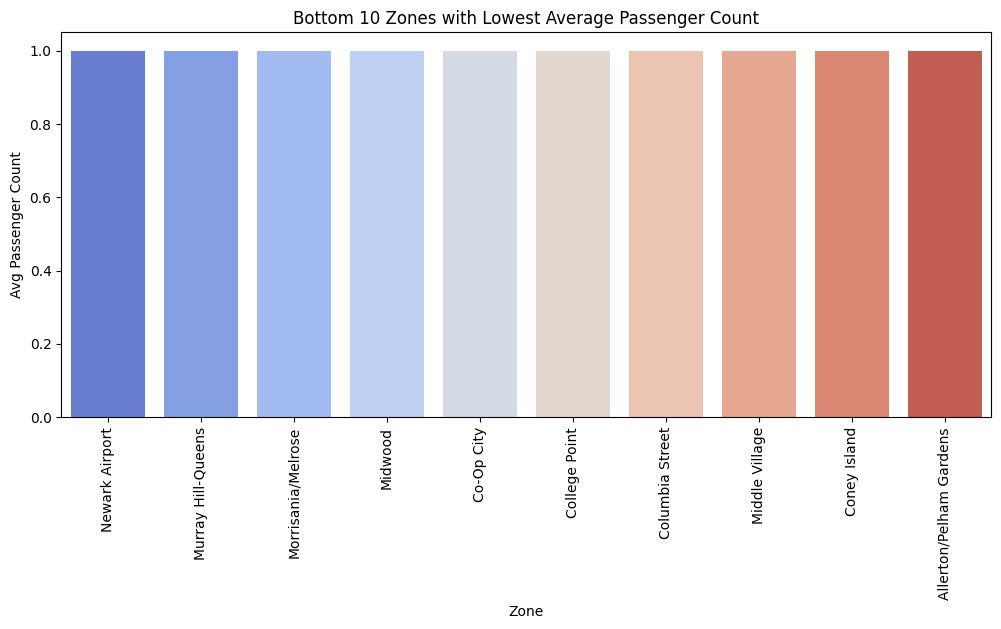

In [77]:
# How does passenger count vary across zones

zone_passenger_count = df.groupby("zone")["passenger_count"].mean().sort_values(ascending=False)

top_10_zones = zone_passenger_count.head(10)
bottom_10_zones = zone_passenger_count.tail(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_zones.index, y=top_10_zones.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 10 Zones with Highest Average Passenger Count")
plt.xlabel("Zone")
plt.ylabel("Avg Passenger Count")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=bottom_10_zones.index, y=bottom_10_zones.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Bottom 10 Zones with Lowest Average Passenger Count")
plt.xlabel("Zone")
plt.ylabel("Avg Passenger Count")
plt.show()



In [78]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_trips = df.groupby("zone").agg(
    avg_passenger_count=("passenger_count", "mean"),
    total_trips=("passenger_count", "count")
).reset_index()

zones_with_trips.sort_values(by="avg_passenger_count", ascending=False).head(10)



,zone,avg_passenger_count,total_trips
109,Inwood Hill Park,3.000000,1
50,Country Club,3.000000,1
113,Jamaica Estates,2.111111,9
3,Arrochar/Fort Wadsworth,2.000000,2
94,Green-Wood Cemetery,2.000000,1
216,Van Cortlandt Park,2.000000,1
9,Battery Park,1.758333,120
184,Saint Michaels Cemetery/Woodside,1.750000,4
173,Red Hook,1.677419,31
159,Ozone Park,1.666667,3


Find out how often surcharges/extra charges are applied to understand their prevalance

<ipython-input-79-a14c8de658e1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=extra_charge_counts.index, y=extra_charge_counts.values, palette="magma")


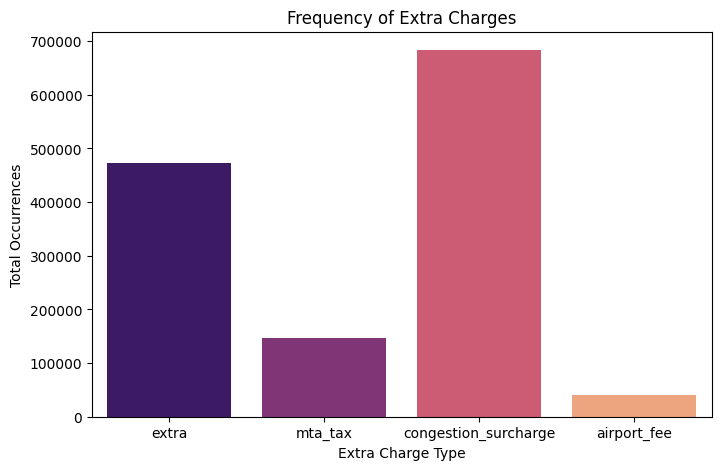

,extra
zone,
LaGuardia Airport,10033
Midtown Center,8841
Upper East Side South,7951
JFK Airport,7417
Upper East Side North,6547
Midtown East,6381
Times Sq/Theatre District,6297
Lincoln Square East,6108
Penn Station/Madison Sq West,5780


In [79]:
# Find out how often surcharges/extra charges are applied to understand their prevalence

extra_charge_counts = df[["extra", "mta_tax", "congestion_surcharge", "airport_fee"]].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=extra_charge_counts.index, y=extra_charge_counts.values, palette="magma")
plt.xlabel("Extra Charge Type")
plt.ylabel("Total Occurrences")
plt.title("Frequency of Extra Charges")
plt.show()

extra_zones = df[df["extra"] > 0].groupby("zone")["extra"].count().sort_values(ascending=False).head(10)

extra_zones


**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Top 10 Pickup Zones with Extra Charges:
 zone
LaGuardia Airport               10033
Midtown Center                   8841
Upper East Side South            7951
JFK Airport                      7417
Upper East Side North            6547
Midtown East                     6381
Times Sq/Theatre District        6297
Lincoln Square East              6108
Penn Station/Madison Sq West     5780
Midtown North                    5402
Name: extra, dtype: int64

Top 10 Dropoff Zones with Extra Charges:
 zone_dropoff
Upper East Side North        7462
Upper East Side South        6966
Midtown Center               5850
Murray Hill                  5285
Times Sq/Theatre District    5249
Upper West Side South        5106
Lincoln Square East          4905
Lenox Hill West              4874
Clinton East                 4671
Midtown East                 4455
Name: extra, dtype: int64


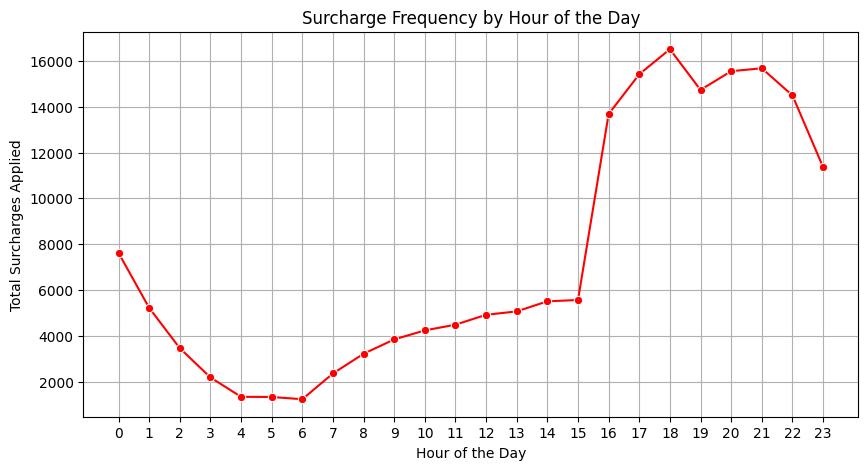

In [80]:
# How often is each surcharge applied?


top_pickup_surcharge_zones = df[df["extra"] > 0].groupby("zone")["extra"].count().sort_values(ascending=False).head(10)

top_dropoff_surcharge_zones = df[df["extra"] > 0].groupby("zone_dropoff")["extra"].count().sort_values(ascending=False).head(10)

print("Top 10 Pickup Zones with Extra Charges:\n", top_pickup_surcharge_zones)
print("\nTop 10 Dropoff Zones with Extra Charges:\n", top_dropoff_surcharge_zones)

df["hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour  # Extract hour if not already done
surcharge_by_hour = df[df["extra"] > 0].groupby("hour")["extra"].count()

# Plot surcharges by time of day
plt.figure(figsize=(10, 5))
sns.lineplot(x=surcharge_by_hour.index, y=surcharge_by_hour.values, marker="o", color="red")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Surcharges Applied")
plt.title("Surcharge Frequency by Hour of the Day")
plt.xticks(range(24))
plt.grid()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

In [ ]:
# Peak Demand Hours are as follows:
#              8 AM - 10 AM, 5 PM - 8 PM (Weekdays)
#              10 PM - 2 AM (Weekends)

# High Revenue Zones:
#              Midtown Manhattan
#              Financial District
#              Airports

# Pricing Optimization:
#              Nighttime fares provide a lot to revenue

# Operational Efficiency:
#              positioning should match high demand areas


**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.